In [1]:
library("tidyverse")
options(repr.plot.width = 5, repr.plot.height = 4, repr.plot.res = 300)

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
eruptions = read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-12/eruptions.csv",
                    col_types = cols(
                        volcano_number = col_double(),
                        volcano_name = col_character(),
                        eruption_number = col_double(),
                        eruption_category = col_character(),
                        area_of_activity = col_character(),
                        vei = col_double(),
                        start_year = col_double(),
                        start_month = col_double(),
                        start_day = col_double(),
                        evidence_method_dating = col_character(),
                        end_year = col_double(),
                        end_month = col_double(),
                        end_day = col_double(),
                        latitude = col_double(),
                        longitude = col_double()
                    )
            )

print(eruptions)

# A tibble: 11,178 x 15
   volcano_number volcano_name eruption_number eruption_catego… area_of_activity
            <dbl> <chr>                  <dbl> <chr>            <chr>           
 1         266030 Soputan                22354 Confirmed Erupt… NA              
 2         343100 San Miguel             22355 Confirmed Erupt… NA              
 3         233020 Fournaise, …           22343 Confirmed Erupt… NA              
 4         345020 Rincon de l…           22346 Confirmed Erupt… NA              
 5         353010 Fernandina             22347 Confirmed Erupt… NA              
 6         273070 Taal                   22344 Confirmed Erupt… NA              
 7         282050 Kuchinoerab…           22345 Confirmed Erupt… NA              
 8         241040 Whakaari/Wh…           22338 Confirmed Erupt… 1978/90 Crater …
 9         311060 Semisopochn…           22341 Confirmed Erupt… NA              
10         284096 Nishinoshima           22340 Confirmed Erupt… NA              
# … 

In [3]:
eruptions %>% 
    group_by(volcano_name) %>%
    count() %>%
    arrange(-n) %>%
    head(1)

volcano_name,n
<chr>,<int>
Etna,241


In [4]:
eruptions %>%
    filter(volcano_name == "Etna") %>%
    select(volcano_name, start_year) %>%
    arrange(-start_year) %>%
    head(1)

volcano_name,start_year
<chr>,<dbl>
Etna,2013


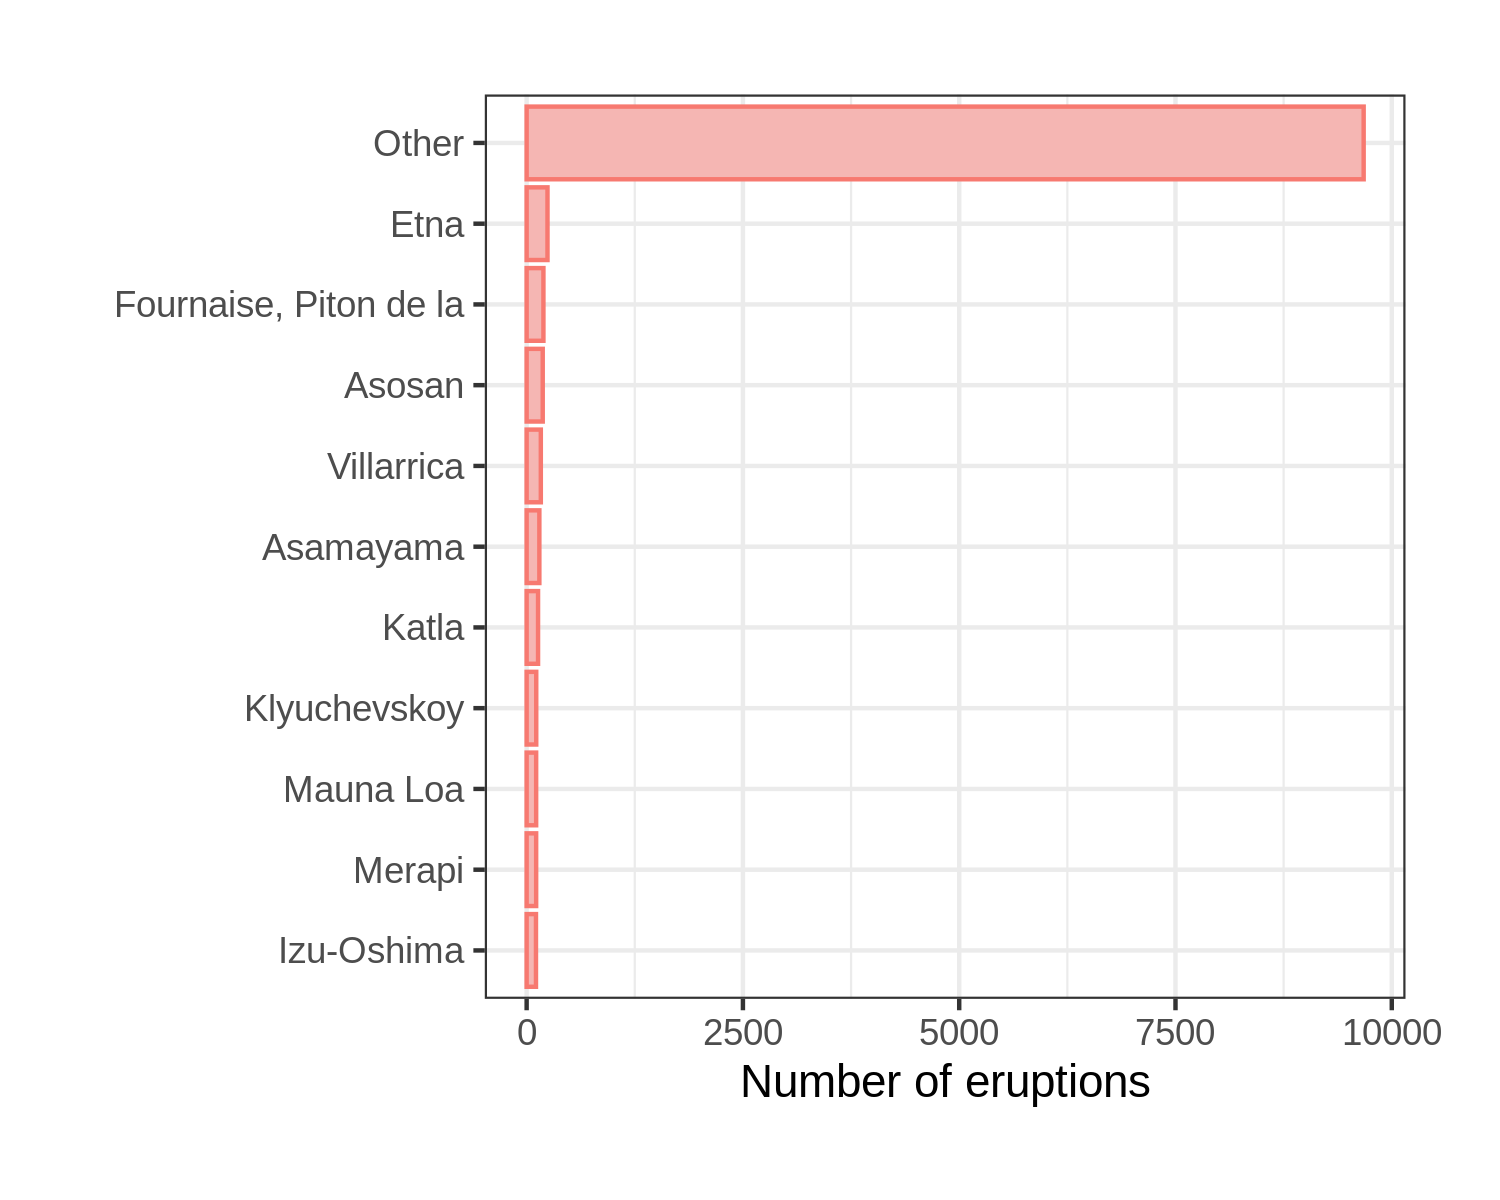

In [5]:
ggplot(eruptions, aes(y = volcano_name %>% fct_lump(n = 10) %>% fct_infreq() %>% fct_rev())) +
    geom_bar(color = "#f77970", fill = "#f5b6b3") +
    labs(x = "Number of eruptions", y = element_blank()) +
    theme_bw() +
    theme(plot.margin = unit(c(.8,.8,.8,.8),"cm"))

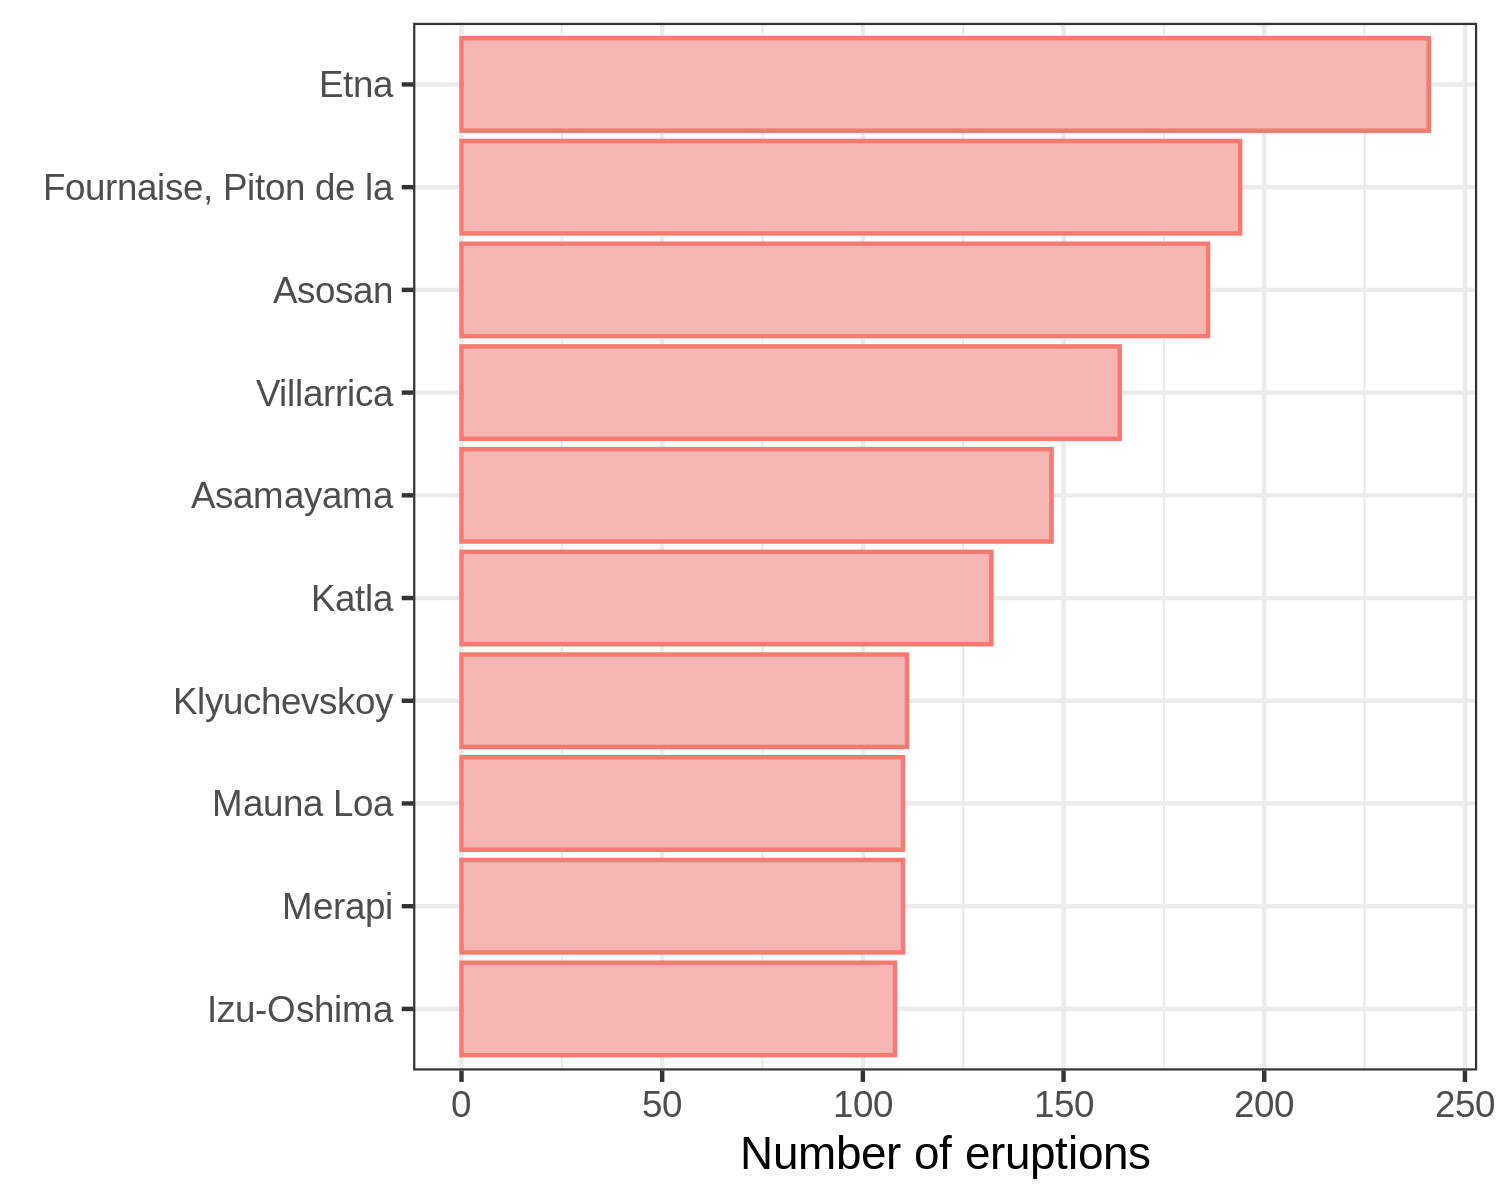

In [6]:
eruptions_ordered = mutate(eruptions, volcano_name_ordered = volcano_name %>%
    fct_lump(n = 10) %>%
    fct_infreq() %>%
    fct_rev())

ggplot(eruptions_ordered %>% filter(volcano_name_ordered != "Other"), aes(y = volcano_name_ordered)) +
    geom_bar(color = "#f77970", fill = "#f5b6b3") +
    labs(x = "Number of eruptions", y = element_blank()) +
    theme_bw()

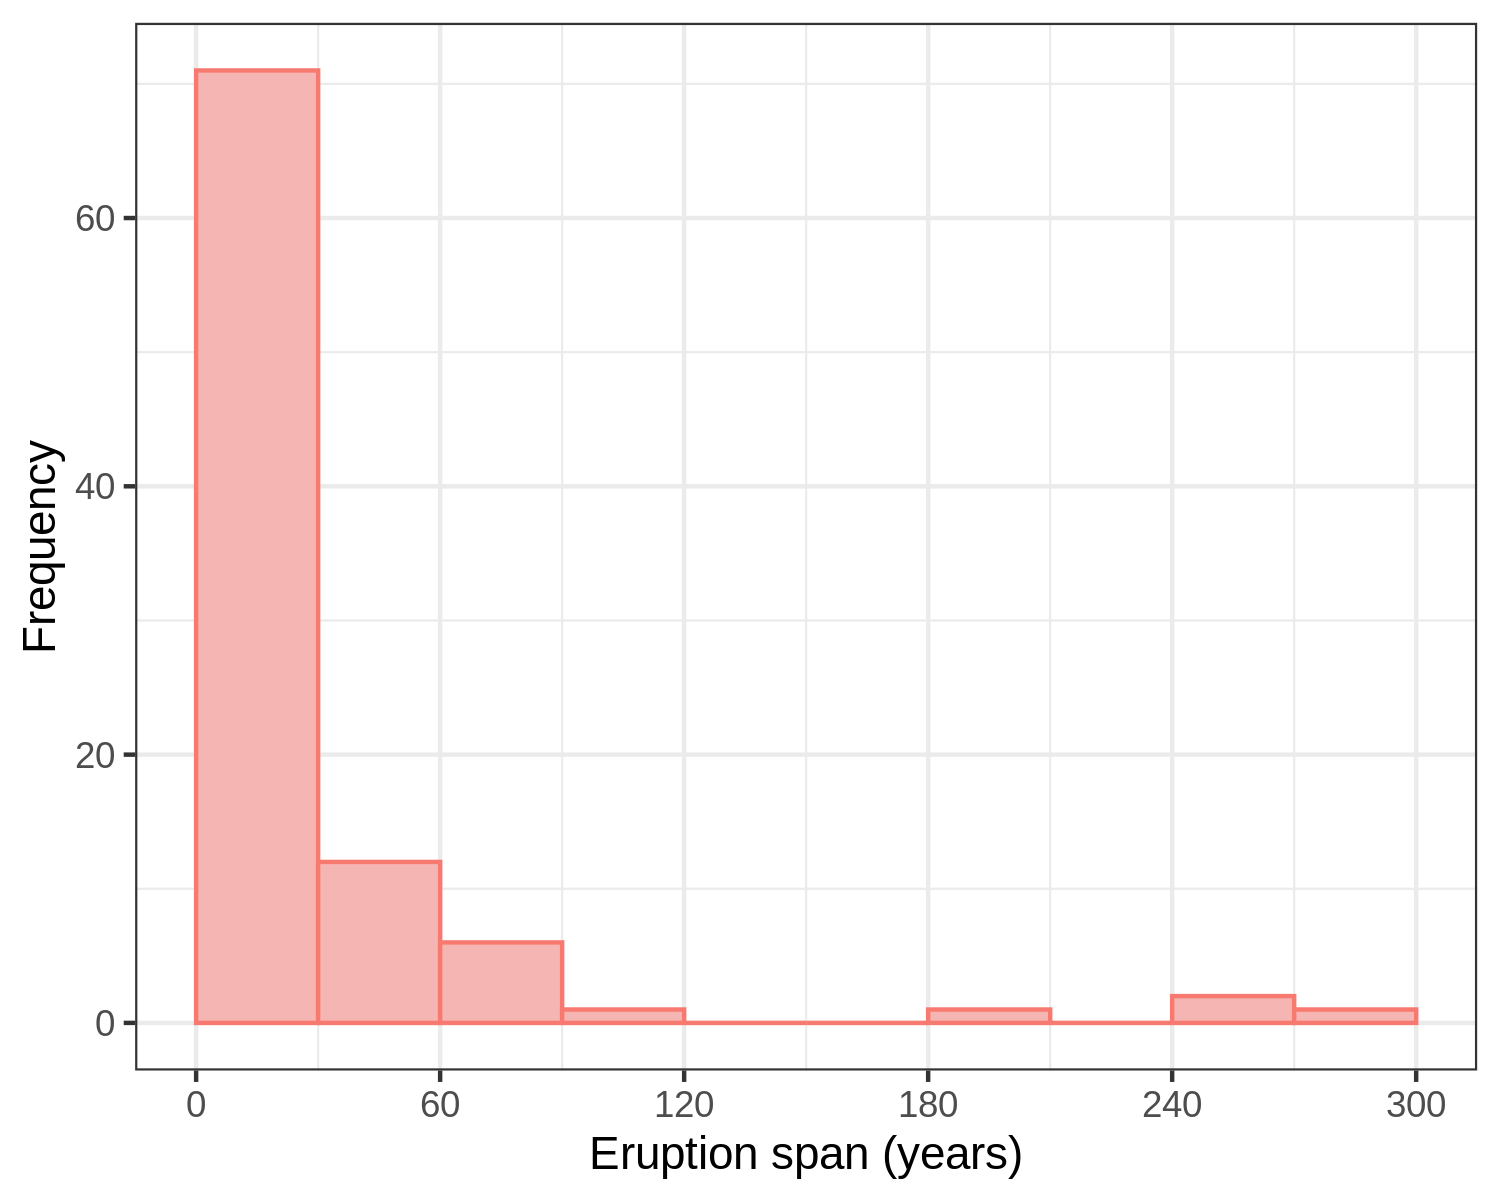

In [7]:
eruptions = mutate(eruptions, eruption_span = end_year - start_year)

ggplot(eruptions %>% filter(eruption_span >= 10), aes(eruption_span)) +
    geom_histogram(binwidth = 30,
                   boundary = 0,
                   color = "#f77970", 
                   fill = "#f5b6b3") +
    labs(x = "Eruption span (years)", y = "Frequency") +
    scale_x_continuous(breaks = seq(0,300,60)) +
    theme_bw()

In [8]:
eruptions %>% 
    select(volcano_name, eruption_span) %>%
    arrange(-eruption_span)  %>%
    head(4)

volcano_name,eruption_span
<chr>,<dbl>
Stromboli,299
Fogo,261
Yasur,246
Sangay,188
